## Mount to Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Install Necessary Modules

In [2]:
%pip install mne
%pip install pyEDFlib

## Import Necessary Modules

In [3]:
import mne
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import zipfile
import torch
from torch import nn
import torch.nn.functional as F
from mne.time_frequency import psd_array_multitaper
import matplotlib.colors as mcolors

## Load the Data

In [4]:
## Parent and Data Directory Path
parent_dir_path = "/content/drive/MyDrive/Colab Notebooks/EEG PhysioNet"
data_dir_path = os.path.join(parent_dir_path, 'data')
zip_path = os.path.join(parent_dir_path, 'EEG-Data.zip')

In [5]:
def unzip_file(zip_path, extract_to):
    # Ensure the extraction path exists
    if not os.path.exists(extract_to):
        os.makedirs(extract_to)

    # Open the zip file
    with zipfile.ZipFile(zip_path, 'r') as ref:
        # Extract all the contents to the specified directory
        ref.extractall(extract_to)
        print(f"Extracted all contents from {zip_path} to {extract_to}")

In [6]:
unzip_file(zip_path, data_dir_path)

Extracted all contents from /content/drive/MyDrive/Colab Notebooks/EEG PhysioNet/EEG-Data.zip to /content/drive/MyDrive/Colab Notebooks/EEG PhysioNet/data


In [7]:
## copy all files from eeg-during-mental-arithmetic-tasks-1.0.0 and paste it in data and delete eeg-during-mental-arithmetic-tasks-1.0.0

!cp -r /content/drive/MyDrive/Colab\ Notebooks/EEG\ PhysioNet/data/eeg-during-mental-arithmetic-tasks-1.0.0/* /content/drive/MyDrive/Colab\ Notebooks/EEG\ PhysioNet/data/
!rm -rf /content/drive/MyDrive/Colab\ Notebooks/EEG\ PhysioNet/data/eeg-during-mental-arithmetic-tasks-1.0.0


In [8]:
# load all edf files from data folder to a list using mne.io.read_raw_edf

edf_files = [os.path.join(data_dir_path, filename) for filename in os.listdir(data_dir_path) if filename.endswith('.edf')]
sorted_edf_files = sorted(edf_files)
raw_data_list = [mne.io.read_raw_edf(edf_file) for edf_file in sorted_edf_files]

Extracting EDF parameters from /content/drive/MyDrive/Colab Notebooks/EEG PhysioNet/data/Subject00_1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /content/drive/MyDrive/Colab Notebooks/EEG PhysioNet/data/Subject00_2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /content/drive/MyDrive/Colab Notebooks/EEG PhysioNet/data/Subject01_1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /content/drive/MyDrive/Colab Notebooks/EEG PhysioNet/data/Subject01_2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /content/drive/MyDrive/Colab Notebooks/EEG PhysioNet/data/Subject02_1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /content/drive

In [9]:
print(raw_data_list)
print(len(raw_data_list))

[<RawEDF | Subject00_1.edf, 21 x 91000 (182.0 s), ~26 kB, data not loaded>, <RawEDF | Subject00_2.edf, 21 x 31000 (62.0 s), ~26 kB, data not loaded>, <RawEDF | Subject01_1.edf, 21 x 91000 (182.0 s), ~26 kB, data not loaded>, <RawEDF | Subject01_2.edf, 21 x 31000 (62.0 s), ~26 kB, data not loaded>, <RawEDF | Subject02_1.edf, 21 x 91000 (182.0 s), ~26 kB, data not loaded>, <RawEDF | Subject02_2.edf, 21 x 31000 (62.0 s), ~26 kB, data not loaded>, <RawEDF | Subject03_1.edf, 21 x 91000 (182.0 s), ~26 kB, data not loaded>, <RawEDF | Subject03_2.edf, 21 x 31000 (62.0 s), ~26 kB, data not loaded>, <RawEDF | Subject04_1.edf, 21 x 85000 (170.0 s), ~26 kB, data not loaded>, <RawEDF | Subject04_2.edf, 21 x 31000 (62.0 s), ~26 kB, data not loaded>, <RawEDF | Subject05_1.edf, 21 x 91000 (182.0 s), ~26 kB, data not loaded>, <RawEDF | Subject05_2.edf, 21 x 31000 (62.0 s), ~26 kB, data not loaded>, <RawEDF | Subject06_1.edf, 21 x 91000 (182.0 s), ~26 kB, data not loaded>, <RawEDF | Subject06_2.edf, 21 

In [10]:
concatenated_raw_data_list = []
for i in range(len(raw_data_list)//2):
  concatenated_data = mne.concatenate_raws([raw_data_list[i*2], raw_data_list[i*2+1]])
  concatenated_raw_data_list.append(concatenated_data)

In [11]:
print(concatenated_raw_data_list)

[<RawEDF | Subject00_1.edf, 21 x 122000 (244.0 s), ~26 kB, data not loaded>, <RawEDF | Subject01_1.edf, 21 x 122000 (244.0 s), ~26 kB, data not loaded>, <RawEDF | Subject02_1.edf, 21 x 122000 (244.0 s), ~26 kB, data not loaded>, <RawEDF | Subject03_1.edf, 21 x 122000 (244.0 s), ~26 kB, data not loaded>, <RawEDF | Subject04_1.edf, 21 x 116000 (232.0 s), ~26 kB, data not loaded>, <RawEDF | Subject05_1.edf, 21 x 122000 (244.0 s), ~26 kB, data not loaded>, <RawEDF | Subject06_1.edf, 21 x 122000 (244.0 s), ~26 kB, data not loaded>, <RawEDF | Subject07_1.edf, 21 x 122000 (244.0 s), ~26 kB, data not loaded>, <RawEDF | Subject08_1.edf, 21 x 122000 (244.0 s), ~26 kB, data not loaded>, <RawEDF | Subject09_1.edf, 21 x 122000 (244.0 s), ~26 kB, data not loaded>, <RawEDF | Subject10_1.edf, 21 x 125000 (250.0 s), ~26 kB, data not loaded>, <RawEDF | Subject11_1.edf, 21 x 122000 (244.0 s), ~26 kB, data not loaded>, <RawEDF | Subject12_1.edf, 21 x 122000 (244.0 s), ~26 kB, data not loaded>, <RawEDF | S

## Analysing Power Spectral Density

In [12]:
data0_before = raw_data_list[0].load_data()
data0_after = raw_data_list[1].load_data()

Reading 0 ... 121999  =      0.000 ...   243.998 secs...
Reading 0 ... 30999  =      0.000 ...    61.998 secs...


### Different Frequencies

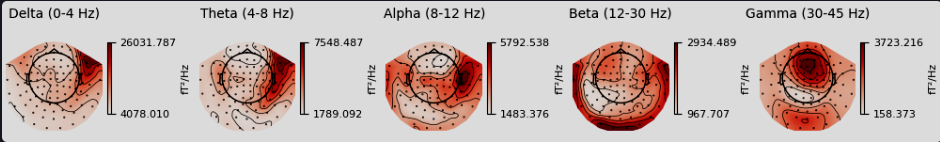

### Plots

#### Delta - (0 Hz - 4 Hz)

##### Before Arithmetic Monitoring

Effective window size : 4.096 (s)
Plotting power spectral density (dB=True).


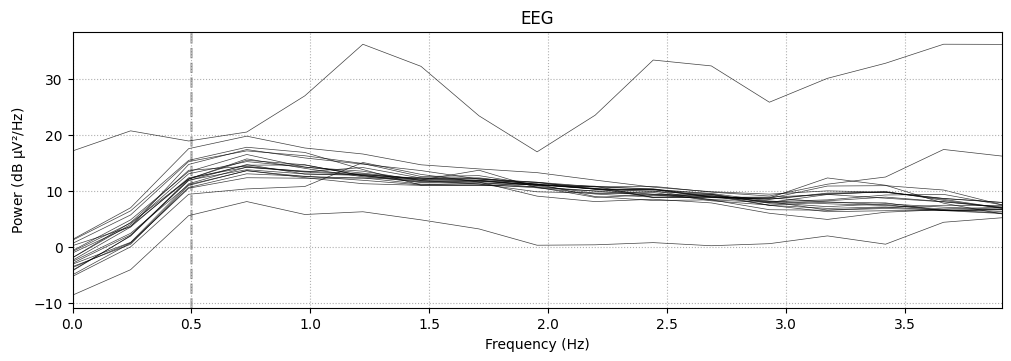

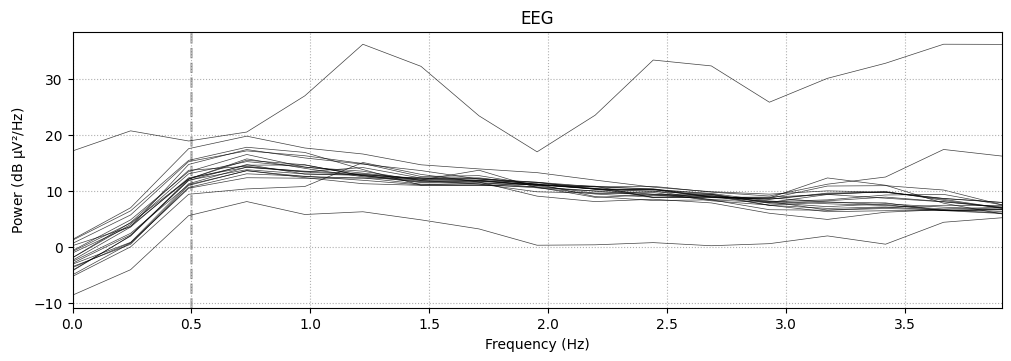

In [13]:
spectrum_before = data0_before.compute_psd(fmin=0, fmax=4)
spectrum_before.plot(average=False, dB=True, amplitude=False, spatial_colors=False, color=mcolors.BASE_COLORS)

##### After Arithmetic Monitoring

Effective window size : 4.096 (s)
Plotting power spectral density (dB=True).


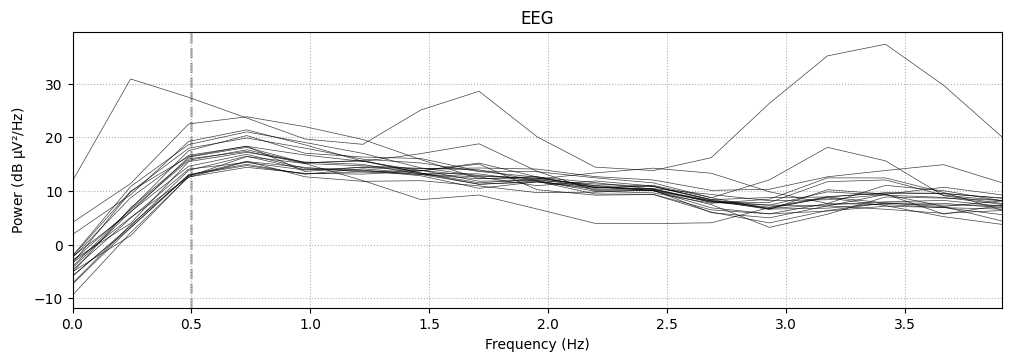

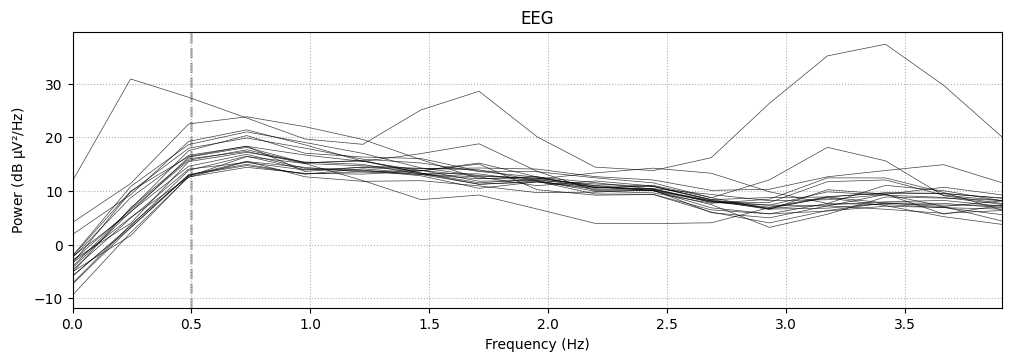

In [14]:
spectrum_after = data0_after.compute_psd(fmin=0, fmax=4)
spectrum_after.plot(average=False, amplitude=False, spatial_colors=False, color=mcolors.BASE_COLORS)

#### Theta - (4 Hz - 8 Hz)

##### Before Arithmetic Monitoring

Effective window size : 4.096 (s)
Plotting power spectral density (dB=True).


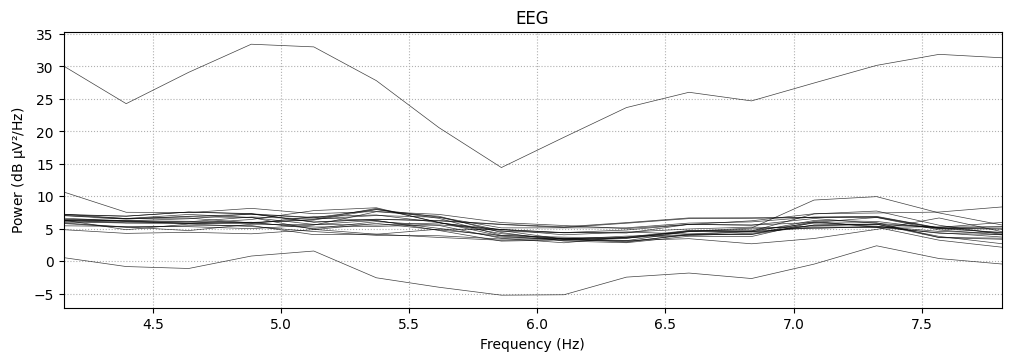

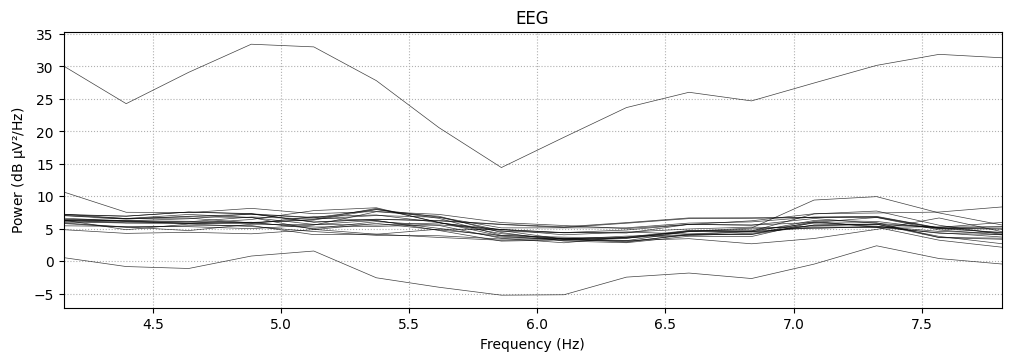

In [15]:
spectrum_before = data0_before.compute_psd(fmin=4, fmax=8)
spectrum_before.plot(average=False, dB=True, amplitude=False, spatial_colors=False, color=mcolors.BASE_COLORS)

##### After Arithmetic Monitoring

Effective window size : 4.096 (s)
Plotting power spectral density (dB=True).


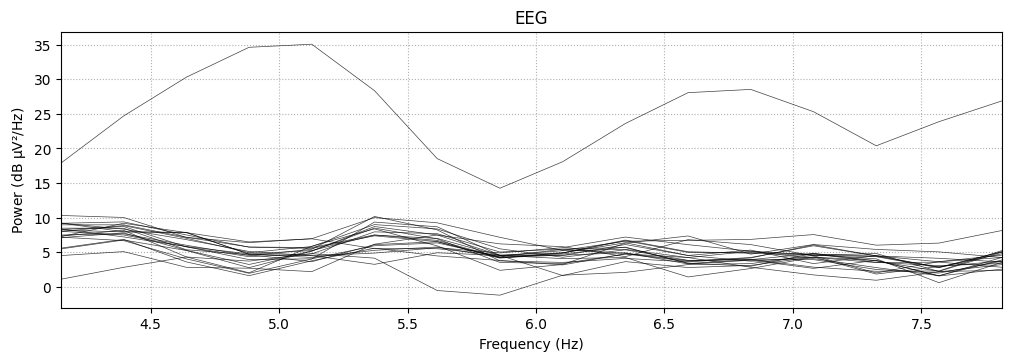

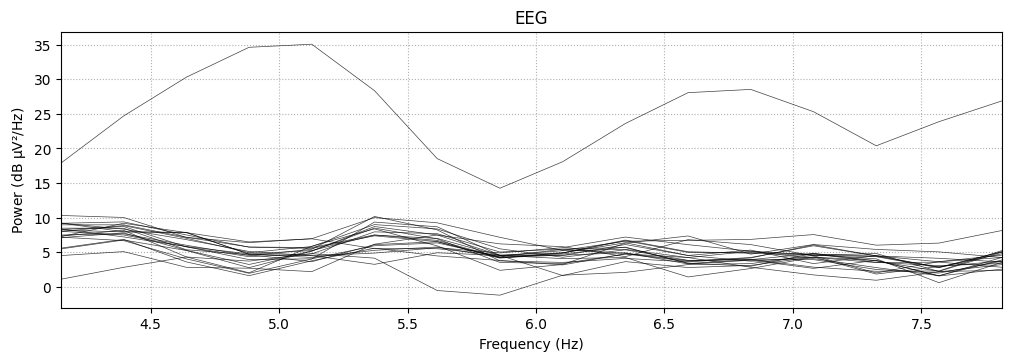

In [16]:
spectrum_after = data0_after.compute_psd(fmin=4, fmax=8)
spectrum_after.plot(average=False, amplitude=False, spatial_colors=False, color=mcolors.BASE_COLORS)

## EEGNet Implementation

In [17]:
class EEGNet(nn.Module):
    def __init__(self, F1: int, F2: int, D: int, N: int, C: int, T: int) -> None:
        super(EEGNet, self).__init__()
        # Variables
        self.C = C
        self.T = T

        # Block 1
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=F1, kernel_size=(1, 64), stride=(1, 1), padding='same')
        self.bn1 = nn.BatchNorm2d(F1)
        self.depthwise_conv = nn.Conv2d(in_channels=F1, out_channels=D*F1, kernel_size=(C, 1), stride=(1, 1), groups=F1)
        self.bn2 = nn.BatchNorm2d(D * F1)
        self.activation1 = nn.ELU()
        self.avg_pool1 = nn.AvgPool2d(kernel_size=(1, 4))
        self.dropout1 = nn.Dropout(p=0.5)  # Choose p=0.25 or p=0.5

        # Block 2
        self.separable_conv = nn.Sequential(
            nn.Conv2d(in_channels=D*F1, out_channels=F2, kernel_size=(1, 16), stride=(1, 1), padding='same', groups=D*F1),
            nn.Conv2d(in_channels=F2, out_channels=F2, kernel_size=1)
        )
        self.bn3 = nn.BatchNorm2d(F2)
        self.activation2 = nn.ELU()
        self.avg_pool2 = nn.AvgPool2d(kernel_size=(1, 8))
        self.dropout2 = nn.Dropout(p=0.5)  # Choose p=0.25 or p=0.5

        # Classifier
        self.flatten = nn.Flatten()
        self.dense = nn.Linear(F2 * (T // 32), N)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        # Block 1
        # x = torch.reshape(x, (1, self.C, self.T))
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.depthwise_conv(x)
        x = self.bn2(x)
        x = self.activation1(x)
        x = self.avg_pool1(x)
        x = self.dropout1(x)

        # Block 2
        x = self.separable_conv(x)
        x = self.bn3(x)
        x = self.activation2(x)
        x = self.avg_pool2(x)
        x = self.dropout2(x)

        # Classifier
        x = self.flatten(x)
        x = self.dense(x)
        x = self.softmax(x)

        return x[:, 0]

### Example running

In [22]:
data = data0_before.get_data()
# Convert the EEG data to a PyTorch tensor
eeg_tensor = torch.from_numpy(data[:1000]).float()

# Create an EEGNet model
model = EEGNet(F1=8, F2=16, D=2, N=2, C=data0_before.info['nchan'], T=eeg_tensor.shape[1])

eeg_tensor = torch.reshape(eeg_tensor, (1, 1, eeg_tensor.shape[0], eeg_tensor.shape[1]))
# Input the EEG data to the EEGNet model
model_output = model(eeg_tensor)

# Print the model output
print(model_output)


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Using padding='same' with even kernel lengths and odd dilation may require a zero-padded copy of the input be created (Triggered internally at ../aten/src/ATen/native/Convolution.cpp:1031.)
  return F.conv2d(input, weight, bias, self.stride,


tensor([0.4389], grad_fn=<SelectBackward0>)


In [23]:
concatenated_raw_data_list = [concatenated_raw_data_list[i] for i in range(len(concatenated_raw_data_list)) if concatenated_raw_data_list[i].get_data().shape[1] == 122000]



### Training

In [24]:
X = concatenated_raw_data_list

In [25]:
Y = pd.read_csv(f"{data_dir_path}/subject-info.csv")

In [26]:
Y = torch.from_numpy(Y['Count quality'].to_numpy())

In [33]:
model.train()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
criterion = nn.BCELoss()


for epoch in range(10):
    for i in range(len(X)):
        x = torch.from_numpy(X[i].get_data()).float()
        # print(x.shape)
        x = torch.reshape(x, (1, 1, x.shape[0], x.shape[1]))
        y = Y[i]
        y = torch.tensor([y])
        y_onehot = torch.zeros(2)
        y_onehot[int(y)] = 1
        y_onehot = y_onehot.view(1, -1).float()

        # Forward pass
        y_pred = model(x)

        # print(y_pred)
        # print(y_onehot)
        loss = criterion(y_pred, y.float())

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Print progress
        print(f'Epoch: {epoch+1}, Batch: {i+1}, Loss: {loss.item():.6f}')



Epoch: 1, Batch: 1, Loss: 0.024295
Epoch: 1, Batch: 2, Loss: 0.040766
Epoch: 1, Batch: 3, Loss: 0.111229
Epoch: 1, Batch: 4, Loss: 0.121805
Epoch: 1, Batch: 5, Loss: 0.265798


KeyboardInterrupt: 